<a href="https://colab.research.google.com/gist/PauloRafaelVeloso/f69eb49f9709513e3cf369dfef8aa9e1/prfev_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 20.4MB/s 
     |████████████████████████████████| 194kB 52.7MB/s 
     |████████████████████████████████| 51kB 8.5MB/s 
     |████████████████████████████████| 1.2MB 54.9MB/s 
     |████████████████████████████████| 12.8MB 247kB/s 
     |████████████████████████████████| 61kB 10.1MB/s 
     |████████████████████████████████| 776.8MB 22kB/s 
     |████████████████████████████████| 51kB 8.5MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
Mounted at /content/gdrive


In [ ]:
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
bear_types = 'grizzly','black','teddy'
path = Path('/content/gdrive/MyDrive/bears')
path

Path('.')

In [ ]:
fns = get_image_files(path)
fns

(#391) [Path('grizzly/00000005.jpg'),Path('grizzly/00000002.jpg'),Path('grizzly/00000001.jpg'),Path('grizzly/00000000.jpg'),Path('grizzly/00000006.jpg'),Path('grizzly/00000007.jpg'),Path('grizzly/00000011.jpg'),Path('grizzly/00000013.jpg'),Path('grizzly/00000008.jpg'),Path('grizzly/00000010.jpg')...]

In [ ]:
failed = verify_images(fns)
failed

(#0) []

In [ ]:
failed.map(Path.unlink);

In [ ]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
dls = bears.dataloaders(path)

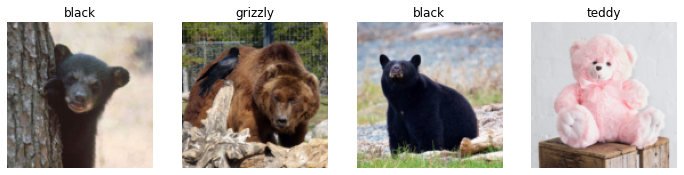

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

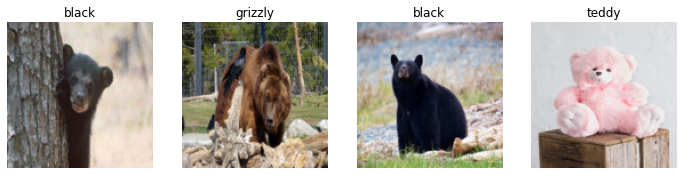

In [ ]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

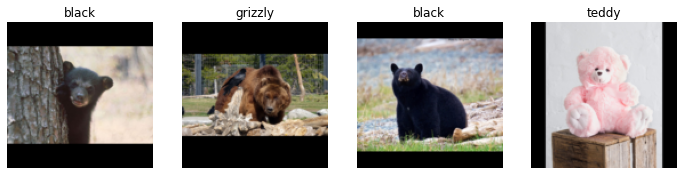

In [ ]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

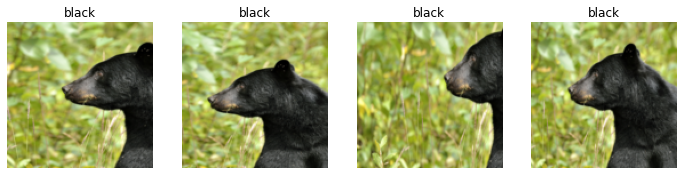

In [ ]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

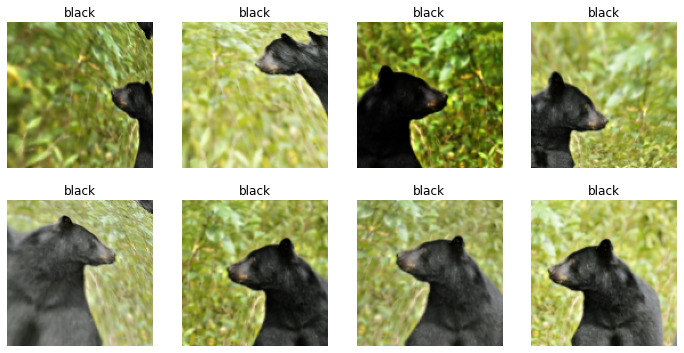

In [ ]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

Training the model

In [ ]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.249256,0.177640,0.038462,00:14


epoch,train_loss,valid_loss,error_rate,time
0,0.220952,0.073700,0.025641,00:14
1,0.159471,0.034298,0.012821,00:15
2,0.110940,0.037677,0.025641,00:14
3,0.094630,0.042324,0.025641,00:14


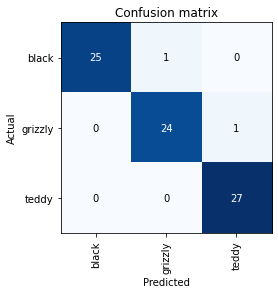

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

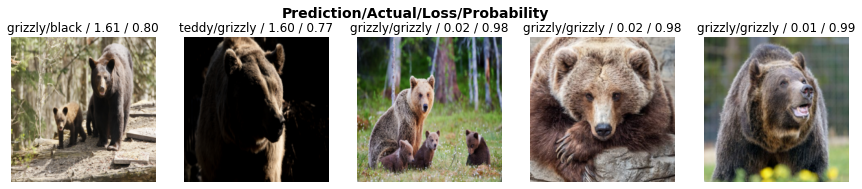

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
Path.BASE_PATH = path

In [ ]:
path.ls()

(#3) [Path('grizzly'),Path('black'),Path('teddy')]

In [ ]:
fname = (path/"grizzly").ls()[0]

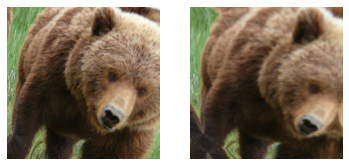

In [ ]:
dblock1 = DataBlock(blocks=(ImageBlock(), CategoryBlock()),
                   get_y=parent_label,
                   item_tfms=Resize(460))
dls1 = dblock1.dataloaders([(gdrive/'grizzly.jpg')]*100, bs=8)
dls1.train.get_idxs = lambda: Inf.ones
x,y = dls1.valid.one_batch()
_,axs = subplots(1, 2)

x1 = TensorImage(x.clone())
x1 = x1.affine_coord(sz=224)
x1 = x1.rotate(draw=30, p=1.)
x1 = x1.zoom(draw=1.2, p=1.)
x1 = x1.warp(draw_x=-0.2, draw_y=0.2, p=1.)

tfms = setup_aug_tfms([Rotate(draw=30, p=1, size=224), Zoom(draw=1.2, p=1., size=224),
                       Warp(draw_x=-0.2, draw_y=0.2, p=1., size=224)])
x = Pipeline(tfms)(x)
TensorImage(x[0]).show(ctx=axs[0])
TensorImage(x1[0]).show(ctx=axs[1]);

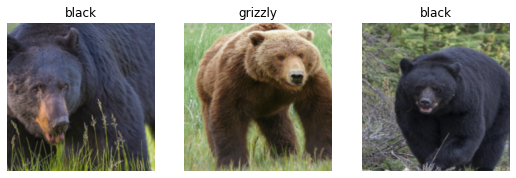

In [ ]:
dls.show_batch(nrows=1, ncols=3)

In [ ]:
bear_types = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'))
bear_types.summary(path)

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.784670,0.759607,0.256410,00:14


epoch,train_loss,valid_loss,error_rate,time
0,0.178459,0.067030,0.025641,00:14
1,0.122197,0.011944,0.000000,00:15


In [ ]:
x,y = dls.one_batch()

In [ ]:
y

TensorCategory([0, 2, 1, 0, 2, 0, 1, 0, 2, 2, 0, 1, 0, 0, 2, 2, 2, 0, 0, 1, 1, 2, 0, 2, 2, 1, 2, 1, 2, 0, 0, 1, 0, 2, 0, 1, 0, 2, 2, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 0, 2, 0, 2, 1, 0, 1, 0],
       device='cuda:0')

In [ ]:
preds,_ = learn.get_preds(dl=[(x,y)])
preds[0]

tensor([9.9985e-01, 7.5577e-06, 1.3982e-04])

In [ ]:
len(preds[0]),preds[0].sum()

(3, tensor(1.))

Creating application

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
learn_inf.predict('/content/gdrive/MyDrive/bears/grizzly/00000000.jpg')

('grizzly', tensor(1), tensor([0.2107, 0.7856, 0.0036]))

In [ ]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(btn_upload.data[-1])

In [ ]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)

In [ ]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: teddy; Probability: 1.0000')

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [ ]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [ ]:
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])